In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

In [3]:
train=pd.read_csv(r'C:\Users\nithin padmanabhan\Downloads\ictak data science\virtual competition\train_ctrUa4K.csv')
train.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y


In [4]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             601 non-null    object 
 2   Married            611 non-null    object 
 3   Dependents         599 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      582 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         592 non-null    float64
 9   Loan_Amount_Term   600 non-null    float64
 10  Credit_History     564 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


In [5]:
train.isna().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

### Filling null Values

In [6]:
for i in train[['Gender', 'Married', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']]:
    train[i] = train[i].fillna(train[i].mode()[0])
train['LoanAmount'] = train['LoanAmount'].fillna(train['LoanAmount'].mean())

In [7]:
train.isna().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

### Removing unnecessary columns and adding new ones.

In [8]:
train['TotalIncome'] = train['ApplicantIncome'] + train['CoapplicantIncome']

In [9]:
train = train.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1)

In [10]:
train.Loan_ID.nunique()

614

In [11]:
del train['Loan_ID']

In [12]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,Male,No,0,Graduate,No,146.412162,360.0,1.0,Urban,Y,5849.0
1,Male,Yes,1,Graduate,No,128.000000,360.0,1.0,Rural,N,6091.0
2,Male,Yes,0,Graduate,Yes,66.000000,360.0,1.0,Urban,Y,3000.0


### Performing Encoding. 

In [14]:
from sklearn.preprocessing import LabelBinarizer
train['Gender'] = LabelBinarizer().fit_transform(train['Gender'])

In [15]:
train['Married'] = LabelBinarizer().fit_transform(train['Married'])
train['Education'] = LabelBinarizer().fit_transform(train['Education'])
train['Self_Employed'] = LabelBinarizer().fit_transform(train['Self_Employed'])
train['Credit_History'] = LabelBinarizer().fit_transform(train['Credit_History'])
train['Loan_Status'] = LabelBinarizer().fit_transform(train['Loan_Status'])

In [16]:
train.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status,TotalIncome
0,1,0,0,0,0,146.412162,360.0,1,Urban,1,5849.0
1,1,1,1,0,0,128.000000,360.0,1,Rural,0,6091.0
2,1,1,0,0,1,66.000000,360.0,1,Urban,1,3000.0


In [17]:
train = pd.get_dummies(train, drop_first= True)

In [18]:
train.head()

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Loan_Status,TotalIncome,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,146.412162,360.0,1,1,5849.0,0,0,0,0,1
1,1,1,0,0,128.000000,360.0,1,0,6091.0,1,0,0,0,0
2,1,1,0,1,66.000000,360.0,1,1,3000.0,0,0,0,0,1
3,1,1,1,0,120.000000,360.0,1,1,4941.0,0,0,0,0,1
4,1,0,0,0,141.000000,360.0,1,1,6000.0,0,0,0,0,1


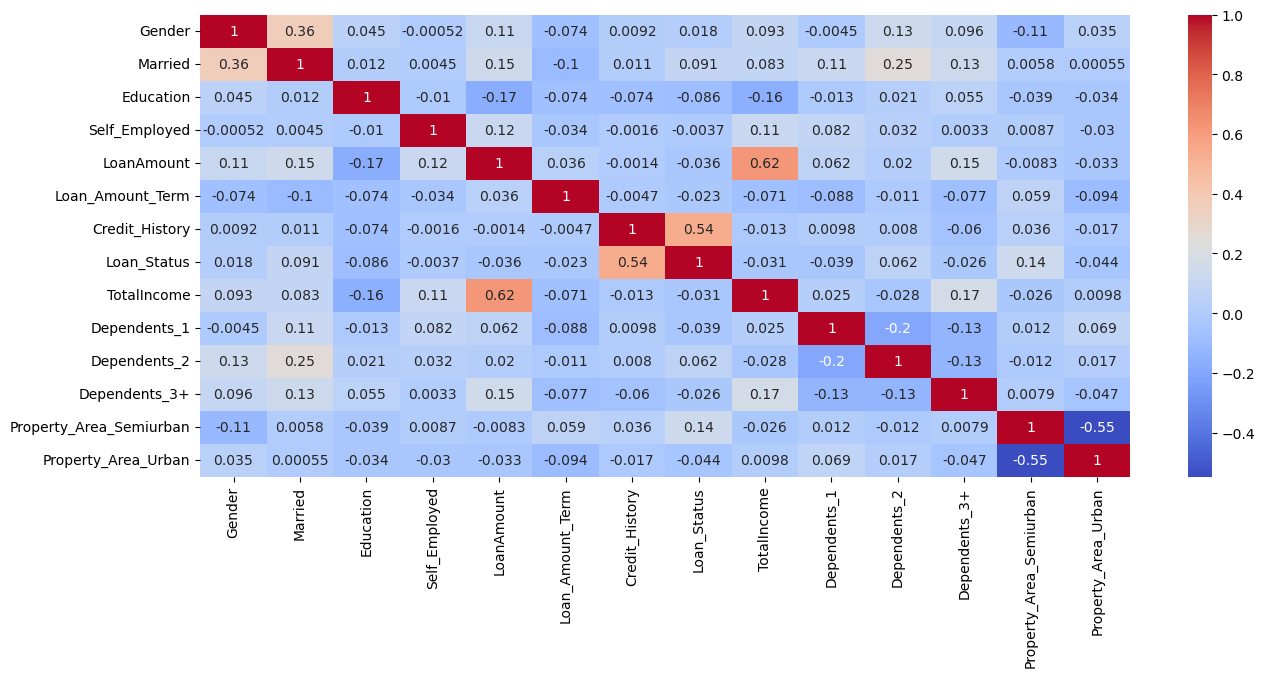

In [19]:
plt.figure(figsize=(15,6))
sns.heatmap(train.corr(),annot = True, cmap = 'coolwarm')
plt.show()

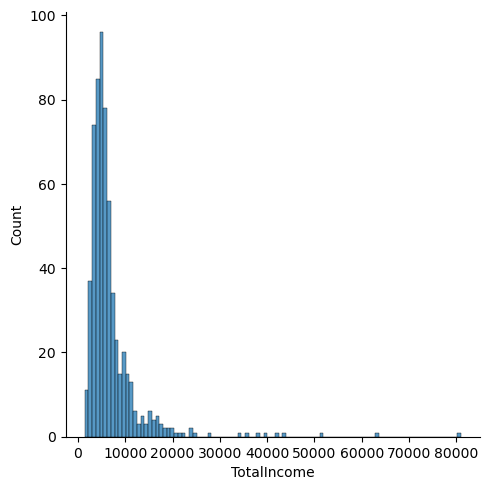

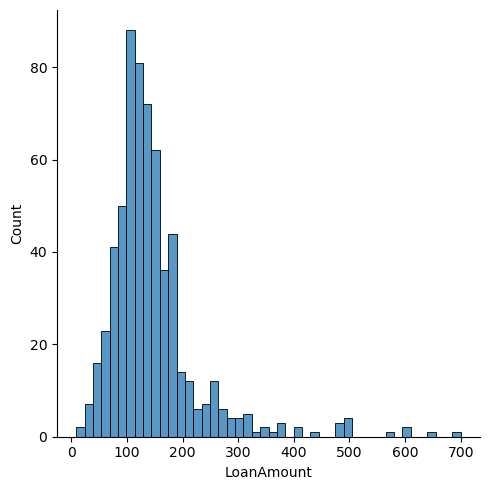

In [20]:
sns.displot(train['TotalIncome'])
sns.displot(train['LoanAmount'])

In [21]:
train['LoanAmount'] = np.log(train['LoanAmount'])
train['TotalIncome'] = np.log(train['TotalIncome'])

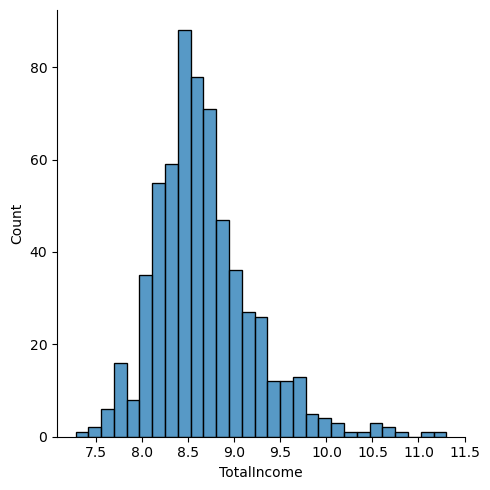

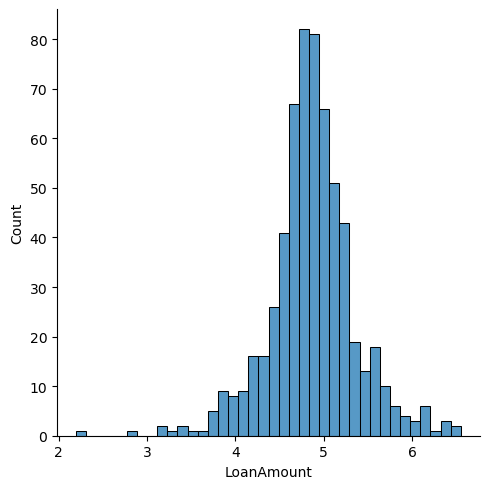

In [22]:
sns.displot(train['TotalIncome'])
sns.displot(train['LoanAmount'])

### Performing Scaling on Train data. 

In [23]:
from sklearn.preprocessing import StandardScaler

In [24]:
train.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status', 'TotalIncome',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'],
      dtype='object')

In [25]:
to_scale = train.drop(['Gender', 'Married', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Loan_Status',
       'Dependents_1', 'Dependents_2', 'Dependents_3+',
       'Property_Area_Semiurban', 'Property_Area_Urban'], axis = 1)

In [26]:
to_scale = StandardScaler().fit_transform(to_scale)

In [27]:
to_scale = pd.DataFrame(to_scale)

In [28]:
train = train.drop(['LoanAmount', 'TotalIncome'], axis = 1)

In [29]:
train.head(3)

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,0,0,0,360.0,1,1,0,0,0,0,1
1,1,1,0,0,360.0,1,0,1,0,0,0,0
2,1,1,0,1,360.0,1,1,0,0,0,0,1


In [30]:
to_scale.columns = ['LoanAmount', 'TotalIncome']

In [31]:
train = pd.concat([train, to_scale], axis = 1)

In [32]:
train.head()

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Loan_Status,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,TotalIncome
0,1,0,0,0,360.0,1,1,0,0,0,0,1,0.250640,0.008468
1,1,1,0,0,360.0,1,0,1,0,0,0,0,-0.020226,0.082903
2,1,1,0,1,360.0,1,1,0,0,0,0,1,-1.355202,-1.217363
3,1,1,1,0,360.0,1,1,0,0,0,0,1,-0.150299,-0.301273
4,1,0,0,0,360.0,1,1,0,0,0,0,1,0.174727,0.055266


# Importing Test data and perfoming EDA and Pre-processing steps before using it for prediction.

In [33]:
test =pd.read_csv(r"C:\Users\nithin padmanabhan\Downloads\ictak data science\virtual competition\test_lAUu6dG.csv")

In [34]:
test.head(3)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,Male,Yes,0,Graduate,No,5720,0,110.0,360.0,1.0,Urban
1,LP001022,Male,Yes,1,Graduate,No,3076,1500,126.0,360.0,1.0,Urban
2,LP001031,Male,Yes,2,Graduate,No,5000,1800,208.0,360.0,1.0,Urban


In [35]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 367 entries, 0 to 366
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            367 non-null    object 
 1   Gender             356 non-null    object 
 2   Married            367 non-null    object 
 3   Dependents         357 non-null    object 
 4   Education          367 non-null    object 
 5   Self_Employed      344 non-null    object 
 6   ApplicantIncome    367 non-null    int64  
 7   CoapplicantIncome  367 non-null    int64  
 8   LoanAmount         362 non-null    float64
 9   Loan_Amount_Term   361 non-null    float64
 10  Credit_History     338 non-null    float64
 11  Property_Area      367 non-null    object 
dtypes: float64(3), int64(2), object(7)
memory usage: 34.5+ KB


In [36]:
test.isnull().sum()

Loan_ID               0
Gender               11
Married               0
Dependents           10
Education             0
Self_Employed        23
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount            5
Loan_Amount_Term      6
Credit_History       29
Property_Area         0
dtype: int64

### Filling null values

In [37]:
for i in test[['Gender', 'Dependents', 'Self_Employed', 'Loan_Amount_Term', 'Credit_History']]:
    test[i] = test[i].fillna(test[i].mode()[0])
test['LoanAmount'] = test['LoanAmount'].fillna(test['LoanAmount'].mean())

In [38]:
test.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
dtype: int64

### Removing unnecessary columns and adding new ones.

In [39]:
test['TotalIncome'] = test['ApplicantIncome'] + test['CoapplicantIncome']
test = test.drop(['ApplicantIncome','CoapplicantIncome'], axis = 1)

In [40]:
test.Loan_ID.nunique()

367

In [41]:
del test["Loan_ID"]

In [42]:
test.head(3)

,Gender,Married,Dependents,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,TotalIncome
0,Male,Yes,0,Graduate,No,110.0,360.0,1.0,Urban,5720
1,Male,Yes,1,Graduate,No,126.0,360.0,1.0,Urban,4576
2,Male,Yes,2,Graduate,No,208.0,360.0,1.0,Urban,6800


### Performing Encoding. 

In [43]:
test['Gender'] = LabelBinarizer().fit_transform(test['Gender'])
test['Married'] = LabelBinarizer().fit_transform(test['Married'])
test['Education'] = LabelBinarizer().fit_transform(test['Education'])
test['Self_Employed'] = LabelBinarizer().fit_transform(test['Self_Employed'])
test['Credit_History'] = LabelBinarizer().fit_transform(test['Credit_History'])

In [44]:
test = pd.get_dummies(test, drop_first= True)

In [45]:
test.head(4)

,Gender,Married,Education,Self_Employed,LoanAmount,Loan_Amount_Term,Credit_History,TotalIncome,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban
0,1,1,0,0,110.0,360.0,1,5720,0,0,0,0,1
1,1,1,0,0,126.0,360.0,1,4576,1,0,0,0,1
2,1,1,0,0,208.0,360.0,1,6800,0,1,0,0,1
3,1,1,0,0,100.0,360.0,1,4886,0,1,0,0,1


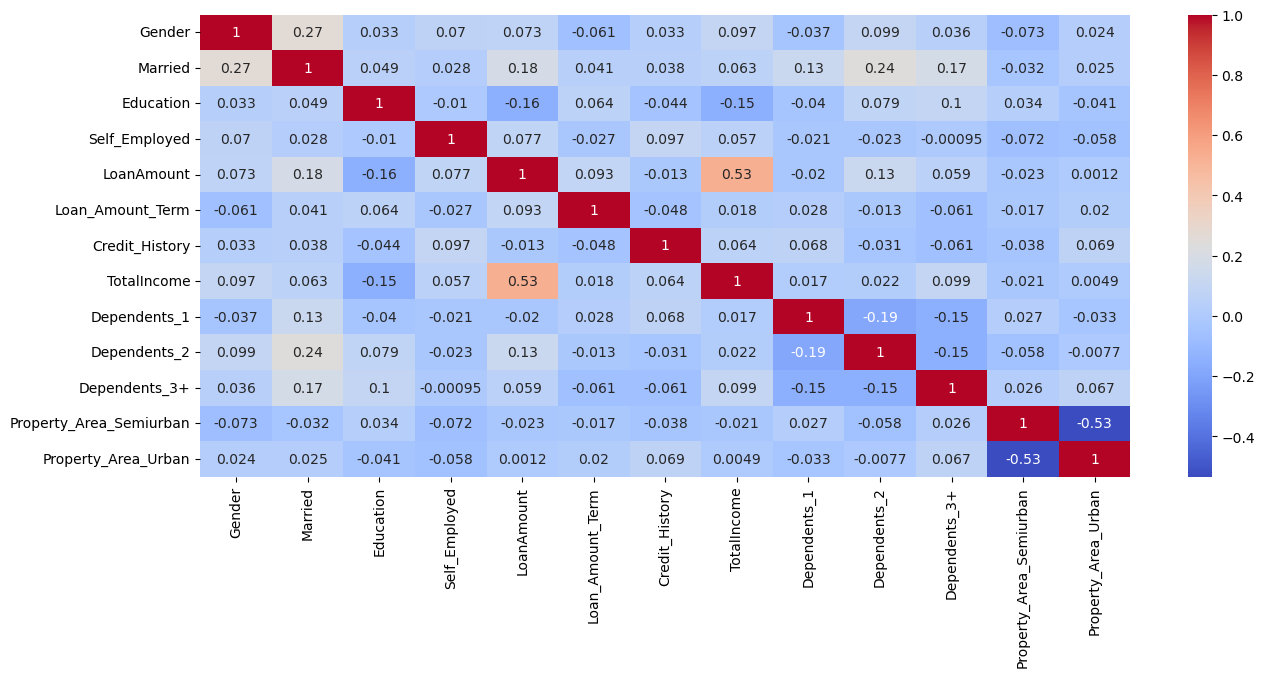

In [46]:
plt.figure(figsize=(15,6))
sns.heatmap(test.corr(),annot = True, cmap = 'coolwarm')
plt.show()

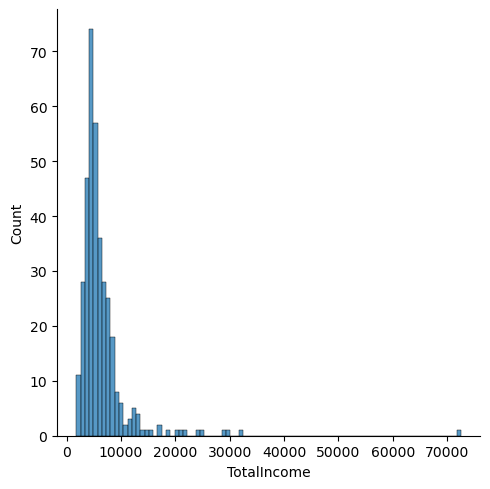

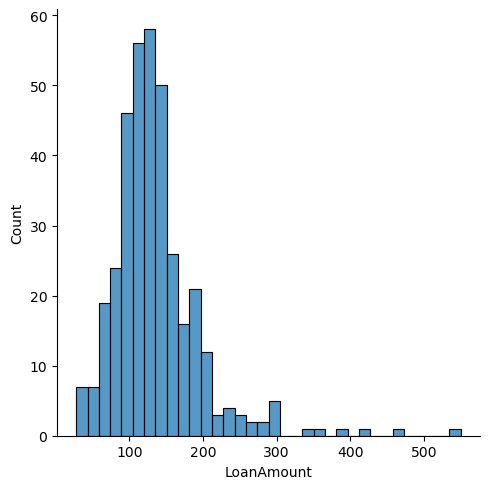

In [47]:
sns.displot(test['TotalIncome'])
sns.displot(test['LoanAmount'])

In [48]:
test['LoanAmount'] = np.log(test['LoanAmount'])
test['TotalIncome'] = np.log(test['TotalIncome'])

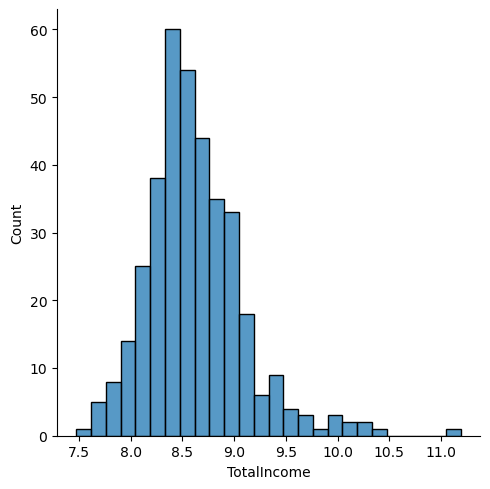

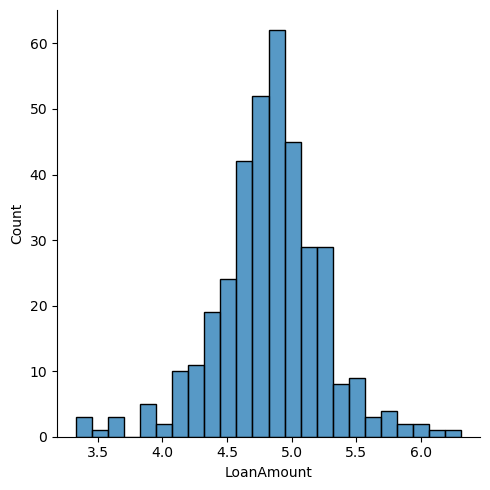

In [49]:
sns.displot(test['TotalIncome'])
sns.displot(test['LoanAmount'])

## Performing Scaling

In [50]:
test.columns

Index(['Gender', 'Married', 'Education', 'Self_Employed', 'LoanAmount',
       'Loan_Amount_Term', 'Credit_History', 'TotalIncome', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban'],
      dtype='object')

In [51]:
to_scale = test.drop(['Gender', 'Married', 'Education', 'Self_Employed',
       'Loan_Amount_Term', 'Credit_History', 'Dependents_1',
       'Dependents_2', 'Dependents_3+', 'Property_Area_Semiurban',
       'Property_Area_Urban'], axis = 1)

In [52]:
to_scale = StandardScaler().fit_transform(to_scale)
to_scale = pd.DataFrame(to_scale)

In [53]:
to_scale.columns = ['LoanAmount', 'TotalIncome']

In [54]:
test = test.drop(['LoanAmount', 'TotalIncome'], axis = 1)

In [55]:
test = pd.concat([test, to_scale], axis = 1)

In [56]:
test.head(3)

,Gender,Married,Education,Self_Employed,Loan_Amount_Term,Credit_History,Dependents_1,Dependents_2,Dependents_3+,Property_Area_Semiurban,Property_Area_Urban,LoanAmount,TotalIncome
0,1,1,0,0,360.0,1,0,0,0,0,1,-0.307163,0.072539
1,1,1,0,0,360.0,1,1,0,0,0,1,0.019485,-0.397171
2,1,1,0,0,360.0,1,0,1,0,0,1,1.225172,0.436600


## Performing train test split on 'Train' data

In [57]:
from sklearn import metrics
from sklearn.metrics import accuracy_score, confusion_matrix

In [58]:
inde = train.drop('Loan_Status', axis = 1)
dep = train['Loan_Status']

In [59]:
from sklearn.model_selection import train_test_split
inde_train, inde_test, dep_train, dep_test = train_test_split(inde, dep, test_size=0.25, random_state= 46)

### Logistic Regression

In [60]:
from sklearn.linear_model import LogisticRegression
logi_model = LogisticRegression(multi_class='auto', solver = 'lbfgs', max_iter=120).fit(inde_train, dep_train)

In [61]:
logi_pred = logi_model.predict(inde_test)

In [62]:
logi_pred

array([1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 0, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       0, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1])

In [63]:
cm = confusion_matrix(dep_test, logi_pred)

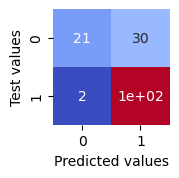

In [64]:
plt.figure(figsize=(1.5,1.5))
sns.heatmap(cm, annot = True, cmap = 'coolwarm', cbar= None)
plt.xlabel('Predicted values')
plt.ylabel('Test values')
plt.show()

In [65]:
print(metrics.classification_report(dep_test, logi_pred))

              precision    recall  f1-score   support

           0       0.91      0.41      0.57        51
           1       0.77      0.98      0.86       103

    accuracy                           0.79       154
   macro avg       0.84      0.70      0.72       154
weighted avg       0.82      0.79      0.77       154



### predicting using the given test dataset

In [66]:
logi_pred = logi_model.predict(test)

In [67]:
logi_pred

array([1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1,
       0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 0, 0, 1, 1, 1, 1, 0,
       1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1,

In [68]:
logi_pred = pd.Series(logi_pred)
logi_pred = logi_pred.replace({1:'Y', 0:'N'})

In [69]:
logi_pred.head(10)

0    Y
1    Y
2    Y
3    Y
4    Y
5    Y
6    Y
7    N
8    Y
9    Y
dtype: object

In [70]:
sample_submission = pd.read_csv(r"C:\Users\ethan\Downloads\sample_submission_49d68Cx.csv")

FileNotFoundError: [Errno 2] No such file or directory: 'C:\\Users\\ethan\\Downloads\\sample_submission_49d68Cx.csv'

In [ ]:
del sample_submission['Loan_Status']

In [ ]:
sample_submission['Loan_Status'] = logi_pred

In [ ]:
sample_submission.head(4)

In [ ]:
sample_submission.to_csv('sample_submission_logi.csv',sep=',', index=False)

### KNN

In [71]:
from sklearn import *
from sklearn.neighbors import KNeighborsClassifier

In [72]:
metric_k=[]
neighbors=np.arange(3,15)

In [74]:
for k in neighbors:
    classifier=KNeighborsClassifier(n_neighbors=k,metric='euclidean')
    classifier.fit(inde_train,dep_train)
    knn_predictions=classifier.predict(inde_test)
    acc=accuracy_score(dep_test,knn_predictions)
    metric_k.append(acc)

In [75]:
print(metric_k)

[0.7142857142857143, 0.7337662337662337, 0.7792207792207793, 0.7662337662337663, 0.7532467532467533, 0.7532467532467533, 0.7142857142857143, 0.7467532467532467, 0.7077922077922078, 0.7272727272727273, 0.7207792207792207, 0.7272727272727273]


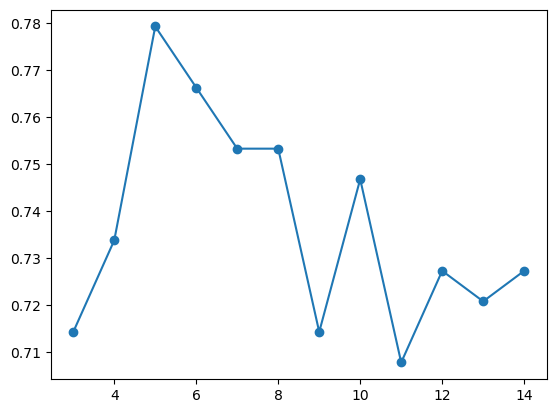

In [76]:
plt.plot(neighbors,metric_k,'o-')

In [78]:
classifier=KNeighborsClassifier(n_neighbors=5,metric='euclidean')
classifier.fit(inde_train,dep_train)
y_predictions=classifier.predict(inde_test)

In [82]:
print(metrics.classification_report(dep_test, y_predictions))

              precision    recall  f1-score   support

           0       0.87      0.39      0.54        51
           1       0.76      0.97      0.85       103

    accuracy                           0.78       154
   macro avg       0.82      0.68      0.70       154
weighted avg       0.80      0.78      0.75       154



### SVC

In [83]:
from sklearn.svm import SVC
svmclf=SVC(kernel='linear')
svmclf.fit(inde_train,dep_train)

SVC(kernel='linear')

In [84]:
y_pred=svmclf.predict(inde_test)

In [85]:
from sklearn.metrics import accuracy_score,confusion_matrix
print('accuracy is',accuracy_score(dep_test,y_pred))

accuracy is 0.7922077922077922


In [86]:
print(confusion_matrix(dep_test,y_pred))

[[ 21  30]
 [  2 101]]


### decision tree

In [88]:
from sklearn.tree import DecisionTreeClassifier
dt_clf=DecisionTreeClassifier()
dt_clf.fit(inde_train,dep_train)

DecisionTreeClassifier()

In [89]:
y_pred=dt_clf.predict(inde_test)

In [90]:
print(confusion_matrix(dep_test,y_pred))

[[26 25]
 [22 81]]


In [93]:
print('accuracy=',accuracy_score(dep_test,y_pred))


accuracy= 0.6948051948051948


### random forest

In [94]:
from sklearn.ensemble import RandomForestClassifier
rf_clf=RandomForestClassifier()
rf_clf.fit(inde_train,dep_train)

RandomForestClassifier()

In [95]:
y_pred=rf_clf.predict(inde_test)

In [96]:
print(confusion_matrix(dep_test,y_pred))

[[23 28]
 [ 7 96]]


In [97]:
print('accuracy=',accuracy_score(dep_test,y_pred))

accuracy= 0.7727272727272727
